In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec
import scipy.optimize as sciop

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [2]:
trueKeps = np.array((1225.,218.,76.,15.,1.,2.,0.,0.,0.,0.))
print(len(trueKeps))
print(np.sum(trueKeps))

print(np.sum(trueKeps*np.arange(1,11)))

10
1537.0
1966.0


In [4]:
#gencounts = number generated
#transitcounts = subset which transit
#simcounts = subset which transit & are detected

allgen = np.zeros((1,10))
allsim = np.zeros((1,10))

for i in range(10):
    gen = np.genfromtxt("./gencounts{0}.dat".format(i))
    sim = np.genfromtxt("./simcounts{0}.dat".format(i))
    allgen = np.vstack((allgen,gen))
    allsim = np.vstack((allsim,sim))

allgen = allgen[1:]
allsim = allsim[1:]
print(np.shape(allgen))
print(np.shape(allsim))

(10000, 10)
(10000, 10)


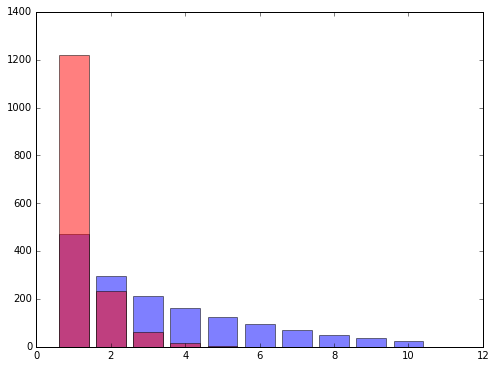

In [5]:
allgen_collapsed = np.mean(allgen,axis=0)
allsim_collapsed = np.mean(allsim,axis=0)


fig = plt.figure(figsize=(8,6))
plt.bar(np.arange(1,11),allgen_collapsed,color='b',alpha=0.5)
plt.bar(np.arange(1,11),allsim_collapsed,color='r',alpha=0.5)
plt.show()

In [12]:
#Calculate percentage of systems with each multiplicity, to populate table 5

percents = np.zeros_like(allgen)

for i in range(0,len(allgen)):
    tot_systems = np.sum(allgen[i])
    #print(tot_systems)
    percents[i] = allgen[i]/tot_systems
    
#print(np.shape(percents))
#print(percents[0])

p50 = np.zeros((10))
p84 = np.zeros((10))
p16 = np.zeros((10))

for j in range(10):
    p50[j] = np.percentile(percents[:,j],50)
    p84[j] = np.percentile(percents[:,j],84) - np.percentile(percents[:,j],50)
    p16[j] = np.percentile(percents[:,j],50) - np.percentile(percents[:,j],16)
    
print(p50*100)
print(p84*100)
print(p16*100)


[31.07670625 19.71740527 13.92904074 10.47865459  7.85478548  5.82930598
  4.22163588  2.97029703  2.02658541  1.39771283]
[7.17824317 1.44017154 1.12962941 1.6582079  1.95061042 1.98319402
 1.77576972 1.52287341 1.16374039 0.87645015]
[8.94180121 2.06650011 1.24945176 1.61041539 1.60885869 1.42650394
 1.20301032 0.95075306 0.69782294 0.53687684]


In [42]:
4.2+3.0+2.0+1.4

10.6

In [35]:
# calculate false singles / observed singles

obs_singles = allsim[:,0]
obs_multiples = np.sum(allsim[:,1:],axis=1)

true_singles = allgen[:,0]
true_multiples = np.sum(allgen[:,1:],axis=1)


false_singles = obs_singles - true_singles

#print(false_singles/obs_singles)
#print(true_singles/obs_singles)
#print((false_singles+true_singles)/obs_singles)

false_percentage = false_singles/obs_singles

print(np.percentile(false_percentage,50)*1225)
print((np.percentile(false_percentage,84) - np.percentile(false_percentage,50))*1225)
print((np.percentile(false_percentage,50) - np.percentile(false_percentage,16))*1225)

745.276369168357
136.96275331167996
107.50363345804894


In [36]:
# Calculate the total number of missing planets

total_planets = np.sum(allgen*np.arange(1,11), axis=1)
print(total_planets)
print(np.shape(total_planets))

print(np.percentile(total_planets,50))
print(np.percentile(total_planets,84) - np.percentile(total_planets,50))
print(np.percentile(total_planets,50) - np.percentile(total_planets,16))

[4602. 4543. 4641. ... 6137. 6642. 6439.]
(10000,)
4843.0
915.0
586.0


In [37]:
4843-1966

2877

In [41]:
(915)/1966.

0.465412004069176

In [3]:
1225/1966.

0.6230925737538149

In [17]:
f_sing = 1225/(1225+218+76+15+1+2)
print(f_sing)

0.7970071567989591


In [24]:
print((f_sing-(0.01*(31.07670625+7.17824317)))/f_sing )
print((f_sing-(0.01*(31.07670625)))/f_sing )
print((f_sing-(0.01*(31.07670625-8.94180121)))/f_sing )

0.5200174917670204
0.6100824693367347
0.7222747016613879


In [27]:
(0.610-0.520)*100

8.999999999999996

In [31]:
0.112*1225

137.20000000000002